# Telecom Churn Data
Source:https://www.kaggle.com/becksddf/churn-in-telecoms-dataset;



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cu=pd.read_csv('./Videos/Python/churn.csv')

In [3]:
cu.shape

(3333, 21)

In [4]:
cu.size

69993

In [6]:
cu.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
cu.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [8]:
cu.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

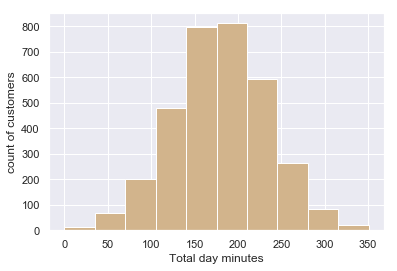

In [16]:
plt.hist(cu['total day minutes'],bins=10,facecolor='tan')
plt.xlabel('Total day minutes')
plt.ylabel('count of customers');


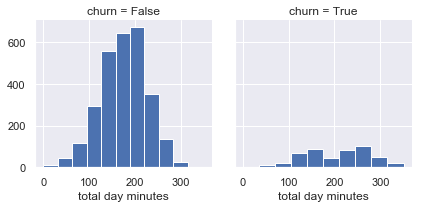

In [17]:
g=sns.FacetGrid(cu,col='churn')
g.map(plt.hist,'total day minutes');

In [18]:
cu['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

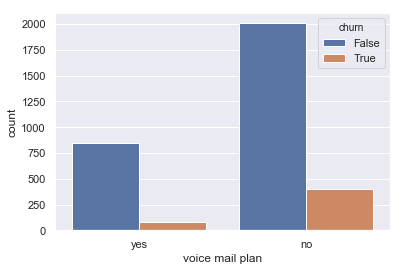

In [22]:
sns.countplot(cu['voice mail plan'],hue=cu['churn']);

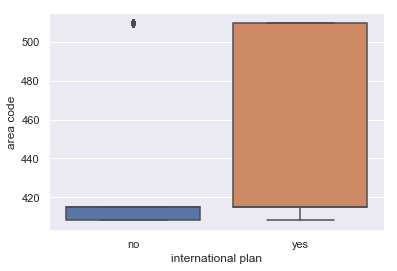

In [25]:
sns.boxplot(x='international plan',y='area code',data=cu);

In [29]:
pd.crosstab(cu['area code'],cu['churn'])

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


In [35]:
pd.pivot_table(cu,index=['area code','voice mail plan'],columns=['international plan'],aggfunc=len)

account length      churn       \
international plan                    no  yes    no  yes   
area code voice mail plan                                  
408       no                         567   51   567   51   
          yes                        200   20   200   20   
415       no                        1082  102  1082  102   
          yes                        423   48   423   48   
510       no                         531   78   531   78   
          yes                        207   24   207   24   

                          customer service calls      number vmail messages  \
international plan                            no  yes                    no   
area code voice mail plan                                                     
408       no                                 567   51                   567   
          yes                                200   20                   200   
415       no                                1082  102                  1082   
          yes                                423   48                   423   
510       no                                 531   78                   531   
          yes                                207   24                   207   

                               phone number       ...   total intl charge  \
international plan         yes           no  yes  ...                  no   
area code voice mail plan                         ...                       
408       no                51          567   51  ...               567.0   
          yes               20          200   20  ...               200.0   
415       no               102         1082  102  ...              1082.0   
          yes               48          423   48  ...               423.0   
510       no                78          531   78  ...               531.0   
          yes               24          207   24  ...               207.0   

                                 total intl minutes        total night calls  \
international plan           yes                 no    yes                no   
area code voice mail plan                                                      
408       no                51.0              567.0   51.0               567   
          yes               20.0              200.0   20.0               200   
415       no               102.0             1082.0  102.0              1082   
          yes               48.0              423.0   48.0               423   
510       no                78.0              531.0   78.0               531   
          yes               24.0              207.0   24.0               207   

                               total night charge        total night minutes  \
international plan         yes                 no    yes                  no   
area code voice mail plan                                                      
408       no                51              567.0   51.0               567.0   
          yes               20              200.0   20.0               200.0   
415       no               102             1082.0  102.0              1082.0   
          yes               48              423.0   48.0               423.0   
510       no                78              531.0   78.0               531.0   
          yes               24              207.0   24.0               207.0   

                                  
international plan           yes  
area code voice mail plan         
408       no                51.0  
          yes               20.0  
415       no               102.0  
          yes               48.0  
510       no                78.0  
          yes               24.0  

[6 rows x 36 columns]

In [36]:
pd.pivot_table(cu,'total intl minutes',index=['area code','voice mail plan'],columns=['international plan'],aggfunc=len)

international plan             no    yes
area code voice mail plan               
408       no                567.0   51.0
          yes               200.0   20.0
415       no               1082.0  102.0
          yes               423.0   48.0
510       no                531.0   78.0
          yes               207.0   24.0

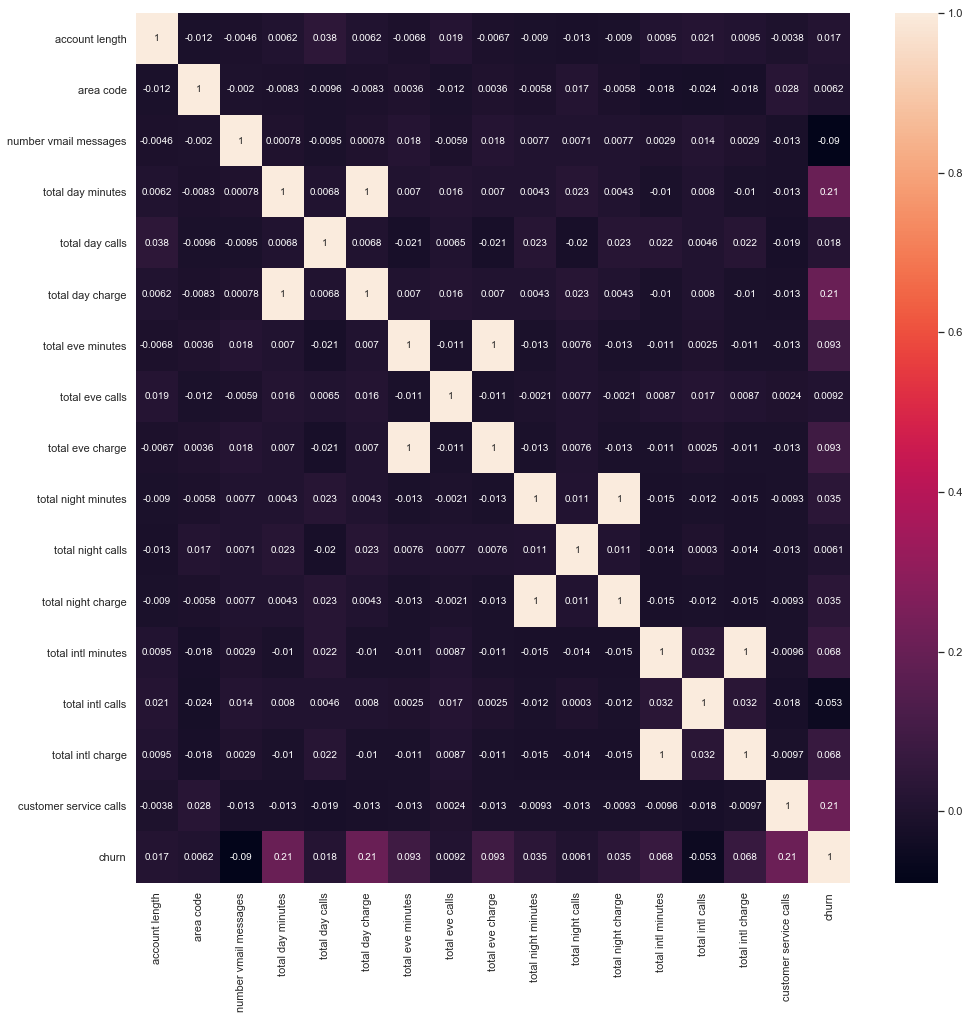

In [38]:
plt.figure(figsize=(16,16))
corr=cu.corr()
sns.heatmap(corr,annot=True);

In [39]:
cu['total night calls'].std()

19.568609346058615

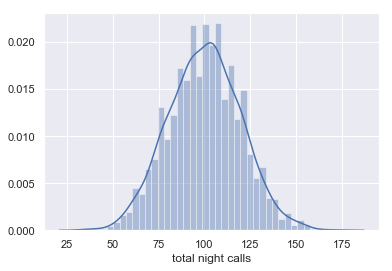

In [42]:
sns.distplot(cu['total night calls']);

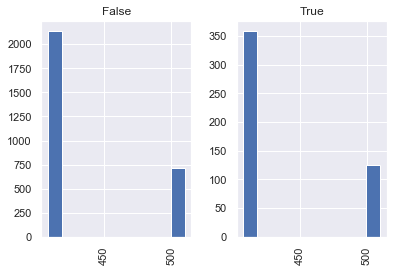

In [47]:
cu.hist(by='churn',column='area code');

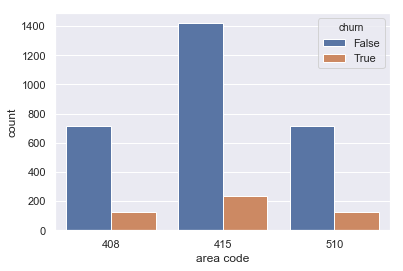

In [48]:
sns.countplot(cu['area code'],hue=cu['churn']);

# Stack overflow survey
Source:https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey?select=survey_results_schema.csv

In [1]:
su=pd.read_csv('./Videos/Python/sur.csv')
qu=pd.read_csv('./Videos/Python/ques.csv')

NameError: name 'pd' is not defined

In [2]:
su.shape

NameError: name 'su' is not defined

In [52]:
su.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [53]:
qu.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


In [55]:
qu.loc[4,'QuestionText']

'Are you currently enrolled in a formal, degree-granting college or university program?'

In [60]:
qu.set_index('Column',inplace=True)
qu.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
Hobby,Do you code as a hobby?
OpenSource,Do you contribute to open source projects?
Country,In which country do you currently reside?
Student,"Are you currently enrolled in a formal, degree..."


In [62]:
qu.loc['Student','QuestionText']

'Are you currently enrolled in a formal, degree-granting college or university program?'

In [65]:
su.isnull().sum()

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

In [66]:
su.isna().apply(pd.value_counts)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
False,98855.0,98855.0,98855.0,98443,94901,95321,94703,79036,71531,92098,...,72108,64469,59765,61813,57473,64574,62596,15781,65941,65879
True,NaN,NaN,NaN,412,3954,3534,4152,19819,27324,6757,...,26747,34386,39090,37042,41382,34281,36259,83074,32914,32976


In [68]:
su['Country'].value_counts().head()

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
Name: Country, dtype: int64

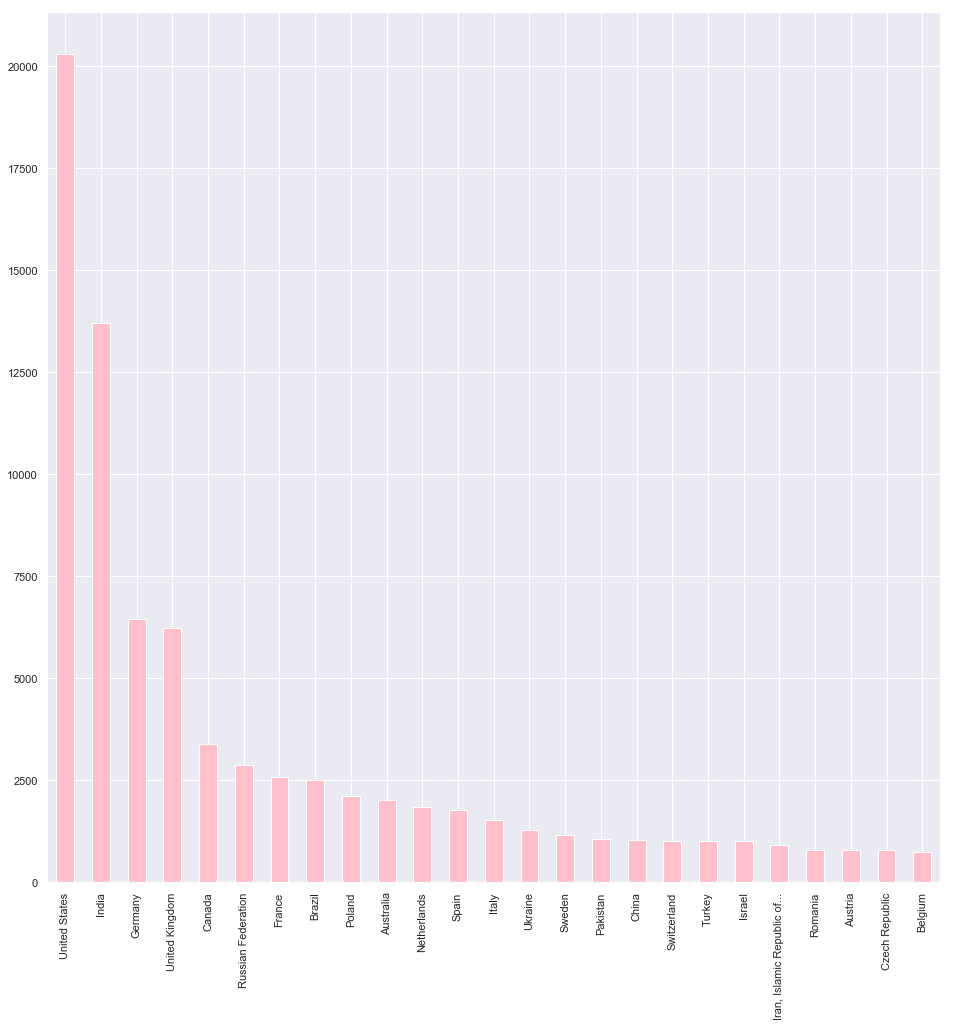

In [74]:
su.Country.value_counts().head(25).plot(kind='bar',color='pink',figsize=(16,16));


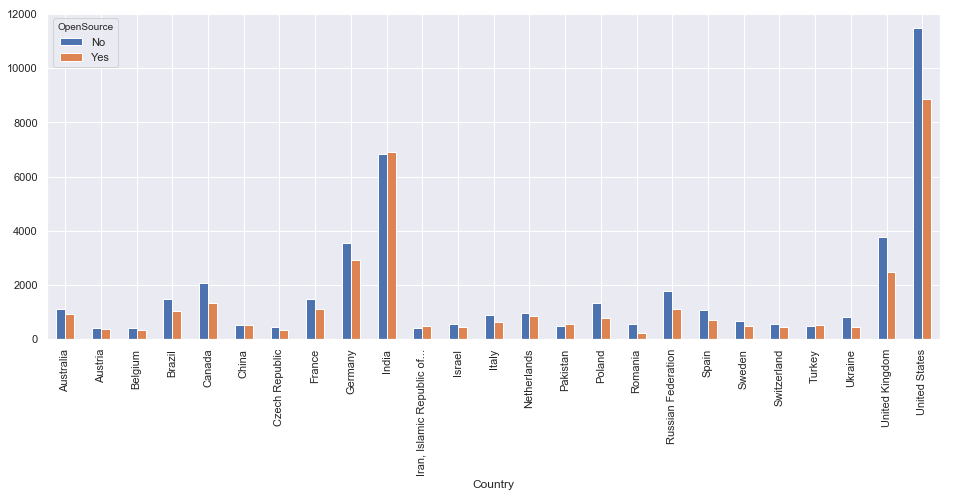

In [79]:
top25=su.loc[su.Country.isin(su.Country.value_counts().head(25).index),:]
pd.crosstab(top25.Country,top25.OpenSource).plot(kind='bar',figsize=(16,6));

In [80]:
su['DevType'].unique()

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'],
      dtype=object)

In [82]:
def split_title(title):
    try: 
        return title.split(sep=';')
    except:
        return []

In [83]:
titles=su.DevType.apply(lambda x:split_title(x))
titles.head()

0                               [Full-stack developer]
1    [Database administrator, DevOps specialist, Fu...
2          [Engineering manager, Full-stack developer]
3                               [Full-stack developer]
4    [Data or business analyst, Desktop or enterpri...
Name: DevType, dtype: object

In [85]:
title_list=[]
for composite_title in su.DevType:
    title_list.extend(split_title(composite_title))

In [86]:
len(np.unique(title_list))

20

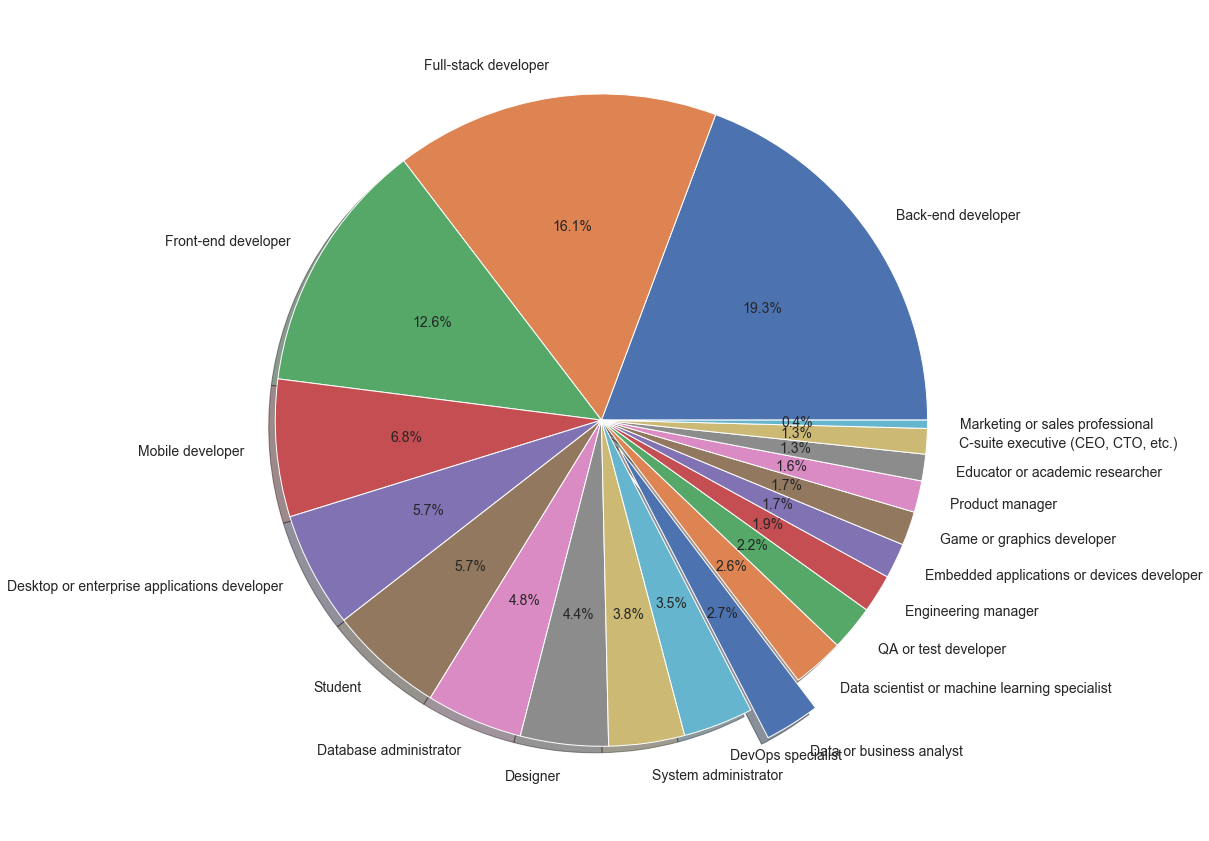

In [105]:
series=pd.Series(title_list).value_counts()
explode=np.zeros(len(series))
indices=series.index.isin(['Data or business analyst', 'Data Scientist or Machine learning specialist'])
explode[indices]=0.1
plt.figure(figsize=(15,15))
plt.pie(series,labels=series.index,autopct='%.1f%%',shadow=True,explode=explode,textprops={'fontsize':14});



In [113]:
an=su.loc[su.DevType.isin(['Data or business analyst','Data scientist or machine learning specialist']),:]

In [114]:
an.shape

(1368, 129)

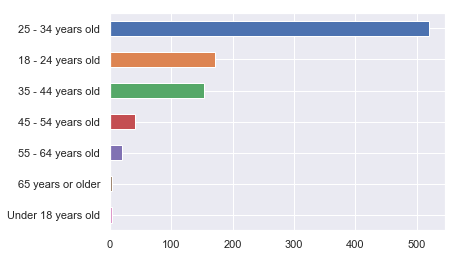

In [120]:
an.Age.value_counts().plot.barh().invert_yaxis()

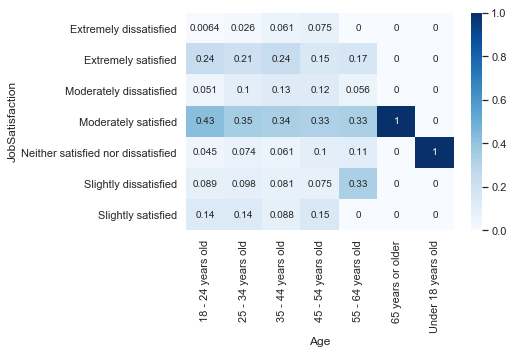

In [121]:
sns.heatmap(pd.crosstab(an.JobSatisfaction,an.Age,normalize='columns'),cmap='Blues',annot=True);

In [123]:
sal=an.loc[:,['Salary','SalaryType','Currency','ConvertedSalary']].dropna()
sal.head()

,Salary,SalaryType,Currency,ConvertedSalary
347,113000,Yearly,U.S. dollars ($),113000.0
393,2500,Monthly,Euros (€),36720.0
576,34000,Yearly,Euros (€),41612.0
618,30000,Yearly,U.S. dollars ($),30000.0
802,300000,Yearly,U.S. dollars ($),300000.0


In [125]:
sal.SalaryType.value_counts()

Yearly     378
Monthly    179
Weekly      18
Name: SalaryType, dtype: int64

In [127]:
sal['monthly_salary']=sal.ConvertedSalary
for i in sal.index:
    if sal.loc[i,'SalaryType']=='Yearly':
        sal.loc[i,'monthly_salary']=sal.loc[i,'ConvertedSalary']/12
    elif sal.loc[i,'SalaryType']=='Weekly':
            sal.loc[i,'monthly_salary']=sal.loc[i,'ConvertedSalary']*4

In [128]:
sal.head()

,Salary,SalaryType,Currency,ConvertedSalary,monthly_salary
347,113000,Yearly,U.S. dollars ($),113000.0,9416.666667
393,2500,Monthly,Euros (€),36720.0,36720.000000
576,34000,Yearly,Euros (€),41612.0,3467.666667
618,30000,Yearly,U.S. dollars ($),30000.0,2500.000000
802,300000,Yearly,U.S. dollars ($),300000.0,25000.000000


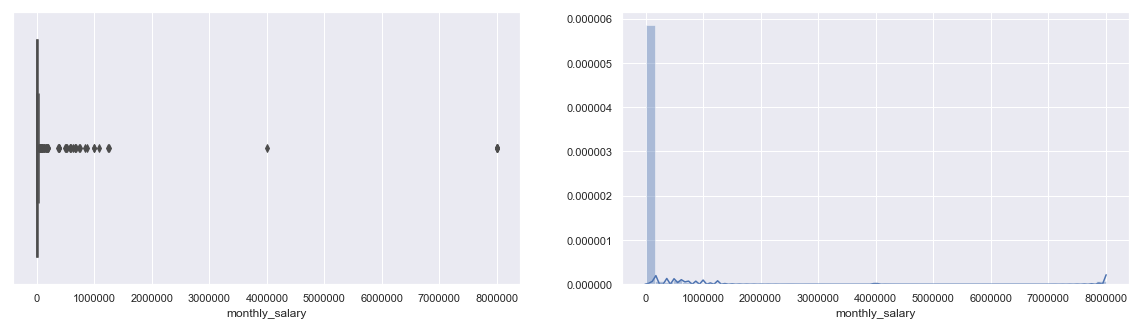

In [131]:
fig,ax=plt.subplots(1,2,sharex=True)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.boxplot(sal.monthly_salary,ax=ax[0]);
sns.distplot(sal.monthly_salary,ax=ax[1]);


In [132]:
sal.monthly_salary.describe().apply(lambda x: format(x,'.2f'))

count        575.00
mean      135512.06
std       838091.65
min            0.00
25%         4718.96
50%         7750.00
75%        19140.00
max      8000000.00
Name: monthly_salary, dtype: object

In [133]:
sal['Salary']=sal.Salary.apply(lambda x: x.replace(',','')).apply(float)

In [135]:
ind_sal=sal.loc[sal.Currency.apply(lambda x: 'Indian' in x),:]
ind_sal['monthly_salary']=ind_sal.Salary

for i in ind_sal.index:
    if ind_sal.loc[i,'SalaryType']=='Yearly':
        ind_sal.loc[i,'monthly_salary']=ind_sal.loc[i,'Salary']/12
    elif ind_sal.loc[i,'SalaryType']=='weekly':
        ind_sal.loc[i,'monthly_salary']=ind_sal.loc[i,'Salary']*4

ind_sal.sample(5)
            
    


,Salary,SalaryType,Currency,ConvertedSalary,monthly_salary
68120,2000000.0,Monthly,Indian rupees (₹),375708.0,2.000000e+06
34531,400000.0,Yearly,Indian rupees (₹),6262.0,3.333333e+04
19671,700000.0,Yearly,Indian rupees (₹),10958.0,5.833333e+04
11723,792000.0,Yearly,Indian rupees (₹),12398.0,6.600000e+04
56964,540000.0,Yearly,Indian rupees (₹),8453.0,4.500000e+04


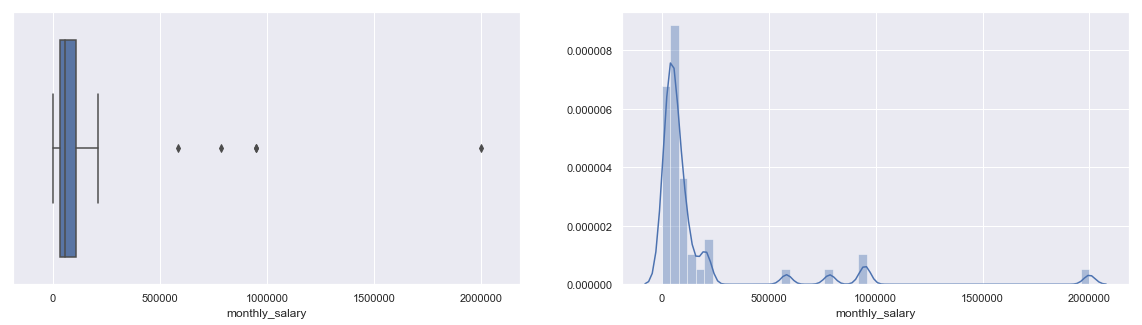

In [136]:
fig,ax=plt.subplots(1,2,sharex=True)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.boxplot(ind_sal.monthly_salary,ax=ax[0]);
sns.distplot(ind_sal.monthly_salary,ax=ax[1]);

In [137]:
ind_sal.monthly_salary.describe().apply(lambda x: format(x,'.0f'))

count         48
mean      170981
std       347704
min            0
25%        35000
50%        58333
75%       106854
max      2000000
Name: monthly_salary, dtype: object